In [2]:
import sys
import pyrootutils

root = pyrootutils.setup_root(sys.path[0], pythonpath=True, cwd=True)



import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

import requests


In [3]:

res = requests.post("http://localhost:8080/predictions/cifar", files={'data': open('test_serve/image/10008_airplane.png', 'rb')})

res.json()


{'frog': 0.9865128993988037,
 'cat': 0.00713546434417367,
 'bird': 0.002858856227248907,
 'deer': 0.00159405916929245,
 'horse': 0.0011247838847339153}

In [4]:

res = requests.post("http://localhost:8080/explanations/cifar", files={'data': open('test_serve/image/10008_airplane.png', 'rb')})
res.json()

[[[-0.002875022136290977,
   -0.0043165663772998224,
   0.0007834648261760849,
   0.021111696574921655,
   0.004260767930990351,
   0.02117836504914541,
   0.03549733078990312,
   -0.006037157793936417,
   0.0005020123456813785,
   -0.006975777976887467,
   0.026217222815481764,
   0.04282265623778097,
   0.010161325590388492,
   0.011783111933510058,
   -0.015351909327970995,
   -0.03652423304067498,
   0.0123043545620364,
   0.010922223647387597,
   0.005039945070311788,
   -0.03178316096870564,
   -0.02221508865152023,
   -0.08433535122528442,
   -0.04240954849231187,
   -0.020562386787972335,
   -0.05878748470268791,
   -0.05220107330396024,
   0.00629325068852723,
   -0.01399171040678835,
   0.01824543355361446,
   0.009815116301876281,
   -0.0004476929979711985,
   0.05623501504022227],
  [-0.005314856837047047,
   -0.003405227089912831,
   0.0025004184361868483,
   -0.012636419533752738,
   -0.05218664291533888,
   0.020735223140414805,
   0.004263694862817061,
   -0.03540313574

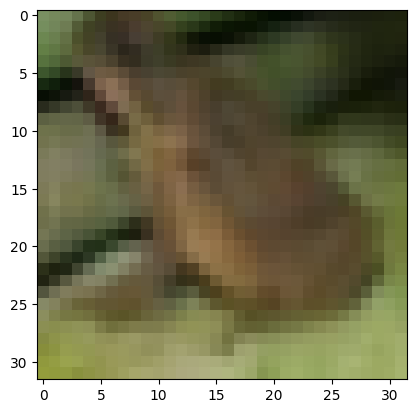

In [8]:

ig = res.json()
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz
img_path = "2.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((32, 32)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)
inp_image.shape, attributions.shape
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="gray")
plt.show()

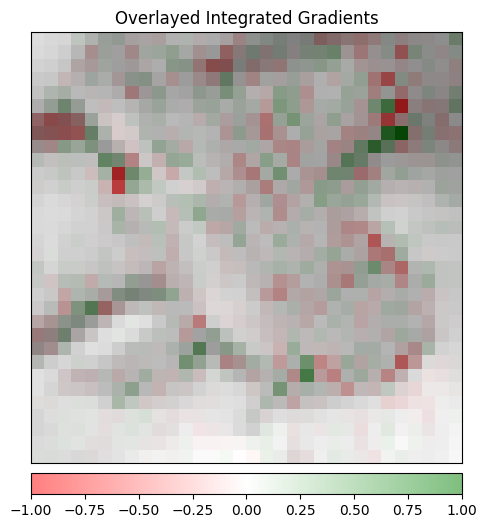

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot: title={'center': 'Overlayed Integrated Gradients'}>)

In [9]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")
